**Drug overdose death rates by drug type sex age race and Hispanic origin United_States.**

1. INDICATOR: This column represents the type of indicator being measured. In this case, it pertains to drug overdose death rates.
2. PANEL: Describes the specific panel or category within the indicator.
3. PANEL_NUM: A numerical identifier associated with the panel.
4. UNIT: Indicates the unit of measurement for the data (e.g., “Deaths per 100,000 resident population, age-adjusted”).
5. UNIT_NUM: A numerical identifier associated with the unit.
6. STUB_NAME: Refers to a specific subgroup or category (e.g., “Total” for all persons).
7. STUB_NAME_NUM: A numerical identifier associated with the subgroup.
8. STUB_LABEL: Provides a label for the subgroup (e.g., “All persons”).
9. STUB_LABEL_NUM: A numerical identifier associated with the subgroup label.
10. YEAR: Represents the year of data collection.
11. YEAR_NUM: A numerical identifier associated with the year.
12. AGE: Indicates the age group (e.g., “All ages”).
13. AGE_NUM: A numerical identifier associated with the age group.
14. ESTIMATE: The actual estimate or value for the drug overdose death rate.
15. FLAG: A flag or indicator (possibly indicating data quality or other relevant information) associated with the estimate.

**Implemented** KNeighborsClassifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:


import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data_set/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv')



In [3]:
df.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,1999,1,All ages,1.10,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2000,2,All ages,1.10,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2001,3,All ages,1.10,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2002,4,All ages,1.10,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2003,5,All ages,1.10,8.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3.25,2018,20,45-54 years,1.60,3.4,NaN
6224,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3.26,2018,20,55-64 years,1.70,2.3,NaN
6225,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3.27,2018,20,65-74 years,1.80,0.4,NaN
6226,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.28,2018,20,75-84 years,1.90,NaN,*


In [ ]:
# prompt: Using dataframe df: do eda

df.describe()


,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5117.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.743443
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.424471
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.800000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,2.100000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,6.000000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


In [ ]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


In [ ]:
df.isnull().sum()

INDICATOR         0
PANEL             0
PANEL_NUM         0
UNIT              0
UNIT_NUM          0
STUB_NAME         0
STUB_NAME_NUM     0
STUB_LABEL        0
STUB_LABEL_NUM    0
YEAR              0
YEAR_NUM          0
AGE               0
AGE_NUM           0
ESTIMATE          0
dtype: int64

array([[<Axes: title={'center': 'PANEL_NUM'}>,
        <Axes: title={'center': 'UNIT_NUM'}>,
        <Axes: title={'center': 'STUB_NAME_NUM'}>],
       [<Axes: title={'center': 'STUB_LABEL_NUM'}>,
        <Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'YEAR_NUM'}>],
       [<Axes: title={'center': 'AGE_NUM'}>,
        <Axes: title={'center': 'ESTIMATE'}>, <Axes: >]], dtype=object)

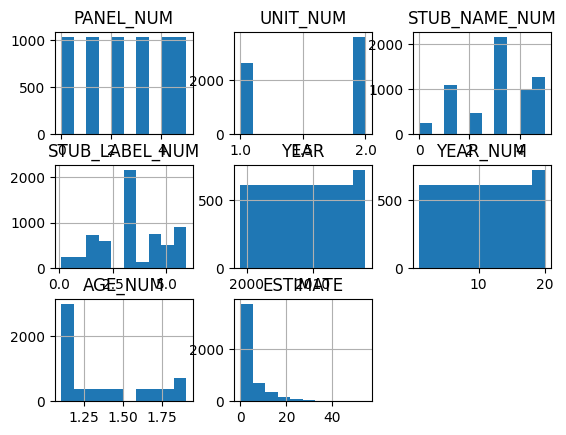

In [ ]:
df.hist()

<Axes: >

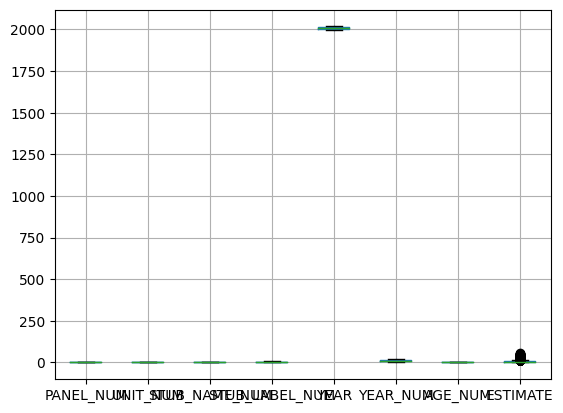

In [ ]:
# prompt: box plot

df.boxplot()


In [ ]:
df.corr()

<ipython-input-84-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
PANEL_NUM,1.000000e+00,-4.031592e-15,-2.011093e-15,1.072281e-16,5.219182e-13,-1.845502e-15,3.889390e-16,-0.459196
UNIT_NUM,-4.031592e-15,1.000000e+00,-6.435342e-01,-6.641615e-01,-3.296496e-02,-3.296496e-02,7.225369e-01,0.046782
STUB_NAME_NUM,-2.011093e-15,-6.435342e-01,1.000000e+00,9.871692e-01,3.188020e-02,3.188020e-02,-4.065313e-01,-0.018596
STUB_LABEL_NUM,1.072281e-16,-6.641615e-01,9.871692e-01,1.000000e+00,3.327485e-02,3.327485e-02,-3.869209e-01,-0.037277
YEAR,5.219182e-13,-3.296496e-02,3.188020e-02,3.327485e-02,1.000000e+00,1.000000e+00,-2.381840e-02,0.280952
YEAR_NUM,-1.845502e-15,-3.296496e-02,3.188020e-02,3.327485e-02,1.000000e+00,1.000000e+00,-2.381840e-02,0.280952
AGE_NUM,3.889390e-16,7.225369e-01,-4.065313e-01,-3.869209e-01,-2.381840e-02,-2.381840e-02,1.000000e+00,0.013675
ESTIMATE,-4.591962e-01,4.678213e-02,-1.859609e-02,-3.727676e-02,2.809520e-01,2.809520e-01,1.367480e-02,1.000000


<ipython-input-85-73d341531261>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().plot()


<Axes: >

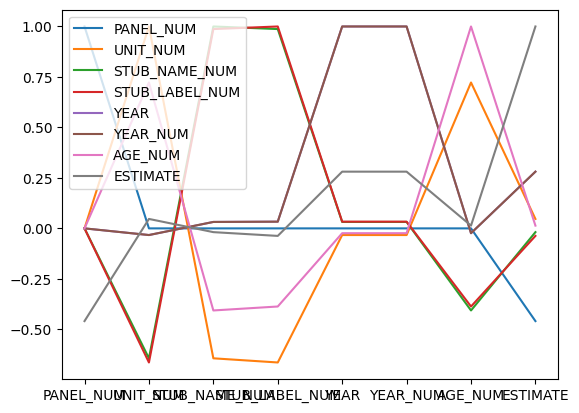

In [ ]:
# prompt: corellate usigng polt

df.corr().plot()


In [ ]:
df.count()

INDICATOR         6228
PANEL             6228
PANEL_NUM         6228
UNIT              6228
UNIT_NUM          6228
STUB_NAME         6228
STUB_NAME_NUM     6228
STUB_LABEL        6228
STUB_LABEL_NUM    6228
YEAR              6228
YEAR_NUM          6228
AGE               6228
AGE_NUM           6228
ESTIMATE          5117
FLAG              1111
dtype: int64

In [ ]:
df['ESTIMATE']

0       6.1
1       6.2
2       6.8
3       8.2
4       8.9
       ... 
6223    3.4
6224    2.3
6225    0.4
6226    NaN
6227    NaN
Name: ESTIMATE, Length: 6228, dtype: float64

In [ ]:
df['FLAG'].unique()

array([nan, '*'], dtype=object)

In [ ]:

df.drop("FLAG", axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9


In [ ]:
# INDICATOR	PANEL	UNIT	UNIT_NUM	STUB_NAME	STUB_LABEL STUB_LABEL_NUM	YEAR	YEAR_NUM	AGE	AGE_NUM
df = df.dropna(subset=['ESTIMATE'])

In [ ]:
df.corr()

<ipython-input-104-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
PANEL_NUM,1.000000,-0.023030,-0.016038,-0.025674,0.045725,0.045725,-0.079083,-0.459196
UNIT_NUM,-0.023030,1.000000,-0.623241,-0.637597,-0.050783,-0.050783,0.728863,0.046782
STUB_NAME_NUM,-0.016038,-0.623241,1.000000,0.989087,0.063533,0.063533,-0.390030,-0.018596
STUB_LABEL_NUM,-0.025674,-0.637597,0.989087,1.000000,0.069843,0.069843,-0.368441,-0.037277
YEAR,0.045725,-0.050783,0.063533,0.069843,1.000000,1.000000,-0.012281,0.280952
YEAR_NUM,0.045725,-0.050783,0.063533,0.069843,1.000000,1.000000,-0.012281,0.280952
AGE_NUM,-0.079083,0.728863,-0.390030,-0.368441,-0.012281,-0.012281,1.000000,0.013675
ESTIMATE,-0.459196,0.046782,-0.018596,-0.037277,0.280952,0.280952,0.013675,1.000000


In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['INDICATOR'] = le.fit_transform(df['INDICATOR'])
df['PANEL'] = le.fit_transform(df['PANEL'])
df['UNIT'] = le.fit_transform(df['UNIT'])
df['UNIT_NUM'] = le.fit_transform(df['UNIT_NUM'])
df['STUB_NAME'] = le.fit_transform(df['STUB_NAME'])
df['STUB_LABEL'] = le.fit_transform(df['STUB_LABEL'])
df['STUB_LABEL_NUM'] = le.fit_transform(df['STUB_LABEL_NUM'])
df['YEAR'] = le.fit_transform(df['YEAR'])
df['YEAR_NUM'] = le.fit_transform(df['YEAR_NUM'])
df['AGE'] = le.fit_transform(df['AGE'])
df['AGE_NUM'] = le.fit_transform(df['AGE_NUM'])


<ipython-input-118-f4f5cf0cee20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INDICATOR'] = le.fit_transform(df['INDICATOR'])
<ipython-input-118-f4f5cf0cee20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PANEL'] = le.fit_transform(df['PANEL'])
<ipython-input-118-f4f5cf0cee20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,0,0,0,0,0,7,0,8,0,0,0,8,0,6.1
1,0,0,0,0,0,7,0,8,0,1,1,8,0,6.2
2,0,0,0,0,0,7,0,8,0,2,2,8,0,6.8
3,0,0,0,0,0,7,0,8,0,3,3,8,0,8.2
4,0,0,0,0,0,7,0,8,0,4,4,8,0,8.9


In [ ]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x79777f7a5480> (for post_execute):


KeyboardInterrupt: ignored

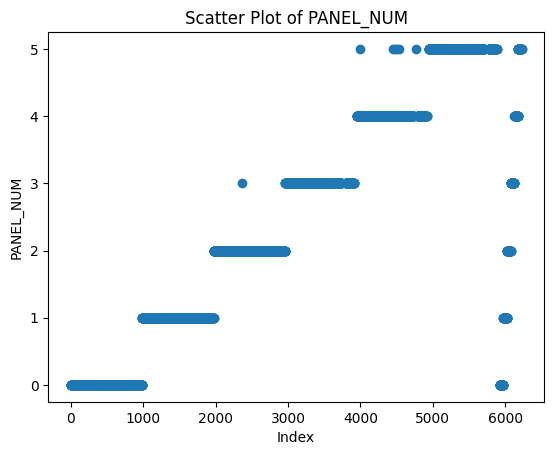

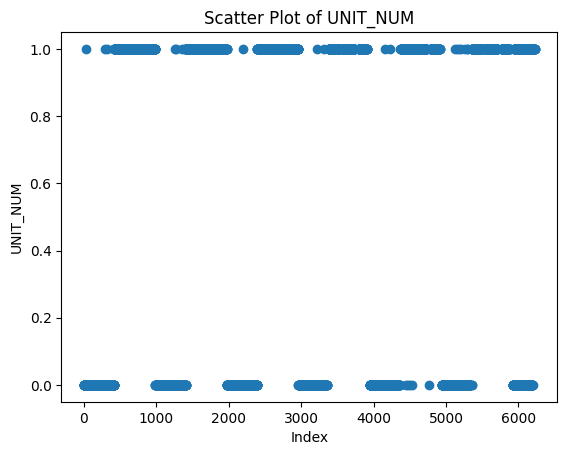

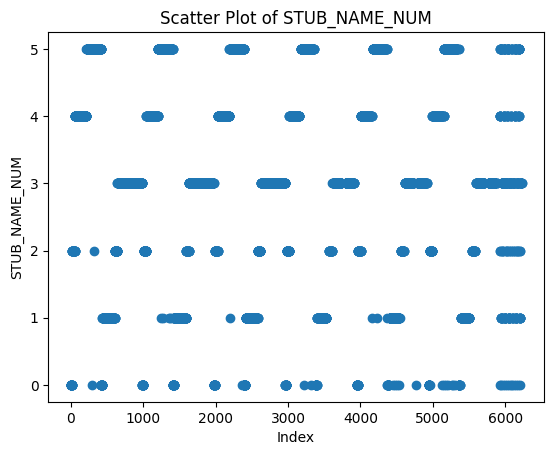

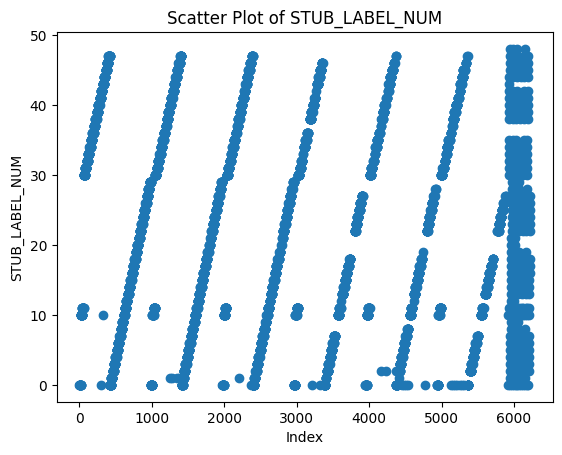

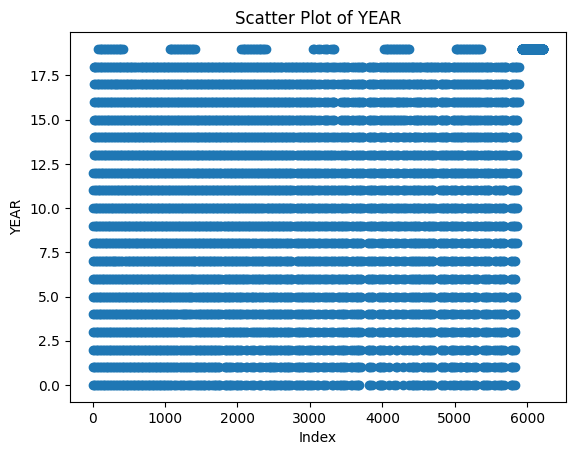

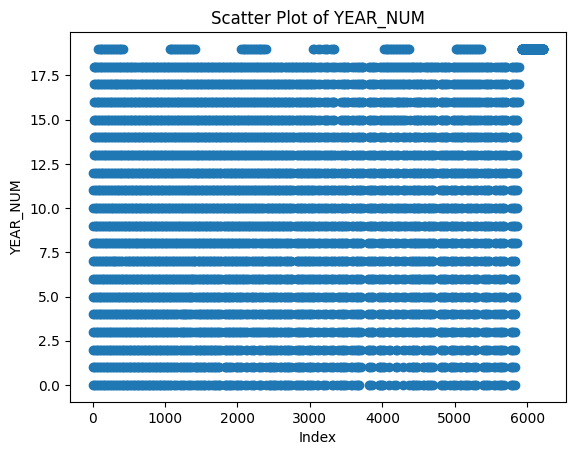

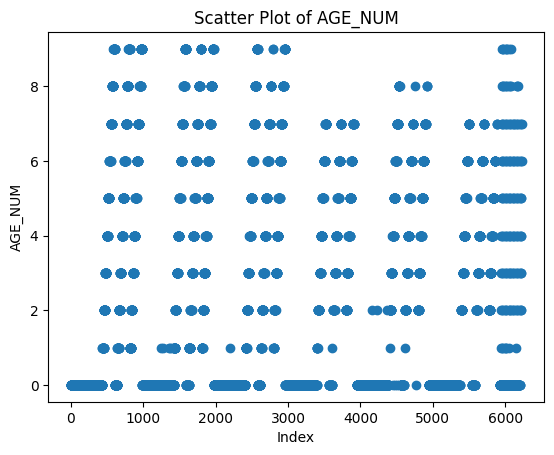

In [ ]:
# PANEL_NUM	UNIT_NUM	STUB_NAME_NUM	STUB_LABEL_NUM	YEAR	YEAR_NUM	AGE_NUM	ESTIMATE

# Select the variable for the scatter plot
variable_to_plot = 'PANEL_NUM'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()


# Select the variable for the scatter plot
variable_to_plot = 'UNIT_NUM'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()


# Select the variable for the scatter plot
variable_to_plot = 'STUB_NAME_NUM'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()


# Select the variable for the scatter plot
variable_to_plot = 'STUB_LABEL_NUM'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()


# Select the variable for the scatter plot
variable_to_plot = 'YEAR'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()


# Select the variable for the scatter plot
variable_to_plot = 'YEAR_NUM'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()

# Select the variable for the scatter plot
variable_to_plot = 'AGE_NUM'
# Create a scatter plot
plt.scatter(df.index, df[variable_to_plot])
plt.title(f'Scatter Plot of {variable_to_plot}')
plt.xlabel('Index')
plt.ylabel(variable_to_plot)
plt.show()

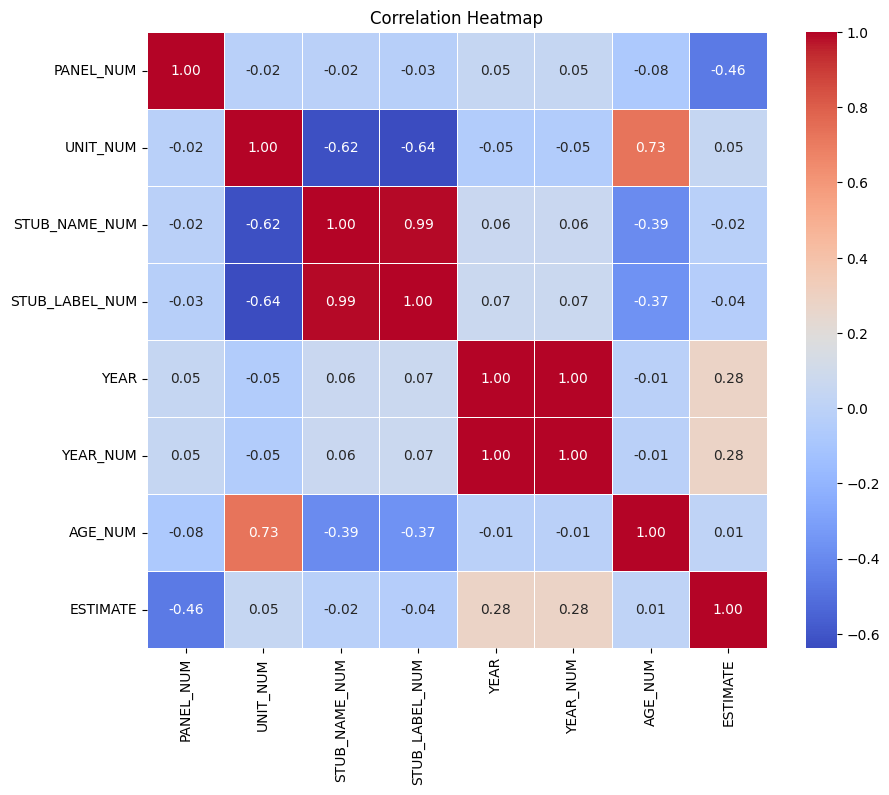

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Select relevant columns
columns_of_interest = ['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE_NUM', 'ESTIMATE']
selected_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Instantiate the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.92
